In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
BASE_DIR = os.getcwd()
IN_DIR = os.path.join(BASE_DIR, "Preprocessed")
PREPROCESSED =os.path.join(BASE_DIR, "Preprocessed")
SEGMENTED = os.path.join(BASE_DIR, "Segmentation")
OUT_DIR = os.path.join(BASE_DIR, "Segmentation")
#!pip install scikit-learn
MID_DIR = PREPROCESSED
if not os.path.exists(OUT_DIR):
    os.makedirs(OUT_DIR)

In [3]:
class Colour:
  RED = "\033[31m" #WRONG
  GREEN = "\033[32m"#GOOD
  YELLOW = "\033[33m"#maybe
  BLUE = "\033[34m"#Path
  MAGENTA = "\033[35m"#confirm

  CYAN = "\033[36m"
  WHITE= "\033[37m"

  END= "\033[0m"


#Reusable end sequence for end via q
def reuseable_end_sequence(prompter):
  choice=input(prompter)
  if choice.lower()=='q':# Q QUIT
    print(f"{Colour.RED}  Exiting Program{Colour.END}")
   # isEnd=True
    raise SystemExit #immediate term
  if choice.strip() == "": #EMPTY STRING
    print(f"{Colour.RED}   Input cannot be Left Empty.{Colour.END}")
    #print("\033[31m  Invalid Input\033[0m")
  return choice


'''
how work
# main.py
from utils import Colors, color_text, greetegcextarct

'''


'\nhow work\n# main.py\nfrom utils import Colors, color_text, greetegcextarct\n\n'

In [5]:

def preprocess_single(img_bgr, out_size=28, pad=5):
    """
    Fully preprocess one input image for digit recognition.
    Output: clean binary image (uint8), white digits on black background.
    """
    # Ensure uint8 (OpenCV expects 0-255 uint8)
    if img_bgr.dtype != np.uint8:
        img_bgr = (img_bgr * 255).astype(np.uint8)

    # 1) Grayscale safely
    if len(img_bgr.shape) == 3:
        gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    else:
        gray = img_bgr.copy()

    # 2) Light blur
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # 3) Adaptive threshold (invert so digits are white)
    bw = cv2.adaptiveThreshold(
        gray, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        25, 10
    )

    # 4) Tight crop
    ys, xs = np.where(bw > 0)
    if xs.size > 0 and ys.size > 0:
        x0, x1, y0, y1 = xs.min(), xs.max(), ys.min(), ys.max()
        tight = bw[y0:y1+1, x0:x1+1]
    else:
        tight = bw

    # 5) Center pad to square
    h, w = tight.shape
    side = max(h, w) + 1*pad
    canvas = np.zeros((side, side), dtype=np.uint8)
    yoff, xoff = (side - h)//2, (side - w)//2
    canvas[yoff:yoff+h, xoff:xoff+w] = tight

    # 6) Resize + quick cleanup
    resized = cv2.resize(canvas, (out_size, out_size), interpolation=cv2.INTER_AREA)
    blurred = cv2.GaussianBlur(resized, (3, 3), 0)
    _, final_bw = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return final_bw


In [7]:
import string
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def multiple_numbers(x, y, num_images, max_digits=10):
  ''''
  Generate Multiple digits or Chars per image,
  Remember x is refing to the nump array of single char imgs, and shape (N,H,W)
  While y is just the nump array of correpsonding labels

  This function aims to return a list of combined images and the corresponding labels for each image before returning to the Preprocessing GUI
  And Saving them as images to the Multi Folder
  Aswell as the testing Function show multiple to test output is correct

  '''
  print(f"{Colour.BLUE}   Moved to multiple_numbers{Colour.END}") #DELETE delete Remove Remove Temp
  imgs = []
  spacing=10
  labels = []
  for i in range(num_images):
    digits_per_image = np.random.randint(1, max_digits + 1)
    ints = np.random.randint(0, len(x), digits_per_image)
    chosen_digits = [x[idx] for idx in ints]
    chosen_labels = [y[idx] for idx in ints]
    spaced_digits=[]#This is just a blank column between digits
    for d in chosen_digits:
        spaced_digits.append(d)
        #ADD IN THE SPACING COLUMN!!!!!
        spaced_digits.append(np.zeros((d.shape[0],spacing), dtype=np.uint8))
    #width =digits_per_image*chosen_digits[0].shape[1]+(digits_per_image-1)*spacing
    spaced_digits = spaced_digits[:-1]
    img = np.hstack(spaced_digits)

    imgs.append(img)
    labels.append(tuple(chosen_labels))

  return imgs, labels


#imgs,labels=multiple_numbers(x_train, y_train, num_images, max_digits=10)

def make_json_safe(labels):
    """Recursive convert any to JSON ceral Python types."""
    if isinstance(labels, np.ndarray):
        return [make_json_safe(x) for x in labels.tolist()]
    elif isinstance(labels, (np.uint8, np.int32, np.int64, np.int16, np.int8)):
        return int(labels)
    elif isinstance(labels, tuple):
        return [make_json_safe(x) for x in labels]
    elif isinstance(labels, list):
        return [make_json_safe(x) for x in labels]
    else:
        return labels

#NOT WORKING
def show_multiple(option,imgs,labels,reform=False):
#Visuals for testing purpose

    image_num=min(len(imgs),5) #Limit to 5 img for display
    plt.figure(figsize=(13, 2))




    plt.show()
    for i in range(image_num):
        plt.subplot(1,image_num,i+1)

        plt.imshow(imgs[i].squeeze(),cmap="gray")
        if reform==True:
            img_arr = np.array(imgs[i])
            if img_arr.size != 256*256:
                raise ValueError(f"Image {i} cannot reshape to 256x256, size={img_arr.size}")
            plt.imshow(img_arr.reshape(256, 256), cmap="gray")


    plt.axis("off")




    plt.show()
    '''

Some issues
such as the inability to read 1 correctly
Added ayfnebtatuib so it could learn robustness
in small avriaitons
also helps to avoid overfitting
for this reason augmentaiton would be added for some reinfrorcement


    '''




In [11]:
%pip install tensorflow-datasets


  Preparing metadata (setup.py) ... done
  Using cached protobuf-5.29.5-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 5.0 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 2.1 MB/s eta 0:00:00 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.6/173.6 kB 2.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 kB 3.5 MB/s eta 0:00:00
Using cached protobuf-5.29.5-cp38-abi3-macosx_10_9_universal2.whl (418 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.3 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21484 sha256=fa888b5ef7a6be5393f59000e694d48057a66b5a5db554fb577824f1f7bcc008
  Stored in directory: /Users/tanmaysingh/Library/Caches/pip/wheels/90/74/b1/9b54c896b8d9409e9268329d4d45ede8a8040abe91c8879932
Successfully built promise
  Attempting uninstall: protobuf
    Found 

In [9]:
'''
Changed Requirements
No longer needs


from emnist import extract_training_samples, extract_test_samples


USIES tensorflwo fatabase instead fo rmnsit and emnsit

install line

changed logic form using apthlib
to ajsut use os

''''## grabs the parent directory of  file.'''

import sys
OUT_DIR = os.path.join(BASE_DIR, "Preprocessed")
import numpy as np
from pathlib import Path
import cv2
import json

#!pip install tensorflow opencv-python tensorflow-datasets
#!pip install opencv-python
import tensorflow as tf

import tensorflow_datasets as tfds
builder = tfds.builder('mnist')

# Force download using DownloadConfig as alt
download_config = tfds.download.DownloadConfig()
builder.download_and_prepare(download_config=download_config)

BASE_DIR = Path.cwd()
# Define  subfolders



def emnist_loader():
    print(f"{Colour.CYAN}   Moved to eminst_loader{Colour.END}") #DELETE delete Remove Remove Temp
    (df_train, df_test) = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True
)

    dataset="emnist"
    x_train, y_train, x_test, y_test= test_train_split(dataset,df_train,df_test)

    return x_train, y_train, x_test, y_test



def test_train_split(dataset,df_train,df_test):
    print(f"{Colour.CYAN}   Moved to test_train_split{Colour.END}") #DELETE delete Remove Remove Temp

    x_train, y_train = [], []
    x_test, y_test = [], []
    if dataset == 'mnist':
        for img, label in tfds.as_numpy(df_train):
            x_train.append(img)
            y_train.append(label)
        x_train = np.array(x_train, dtype='float32') / 255.0
        y_train = np.array(y_train,dtype='int64')
         # append img and labels to test instances


        for img, label in tfds.as_numpy(df_test):
                x_test.append(img)
                y_test.append(label)
        x_test = np.array(x_test, dtype='float32') / 255.0
        y_test = np.array(y_test,dtype='int64')



    #x_train, y_train = np.array(x_train), np.array(y_train)
    if dataset == 'emnist':
        x_train = [img.squeeze().T for img in x_train]
        for img, label in tfds.as_numpy(df_train):
            img = tf.image.rot90(img, k=1)      # EMNIST fix
            img = tf.image.flip_left_right(img) # EMNIST fix
            x_train.append(img)
            y_train.append(label - 1)
        for img, label in tfds.as_numpy(df_test):
             img = tf.image.rot90(img, k=1)
             img = tf.image.flip_left_right(img)
             x_test.append(img)
             y_test.append(label - 1)
        x_train = np.array(x_train).reshape(-1, 28, 28, 1).astype("float32") / 255.0
        x_test  = np.array(x_test).reshape(-1, 28, 28, 1).astype("float32") / 255.0
        y_train = np.array(y_train)
        y_test  = np.array(y_test)







    print(f"{Colour.MAGENTA}Train:\n  X_train:{x_train.shape},\n  Y_train:{y_train.shape}\n{Colour.END}")
    print(f"{Colour.MAGENTA}Test:\n  X_test:{x_test.shape},\n  Y_test:{y_test.shape}\n{Colour.END}")

    return x_train, y_train, x_test, y_test



'''
Updated so both use the same tfds databse to minise need for libaries'''
def mnist_loader():
    print(f"{Colour.CYAN}   Moved to minst_loader{Colour.END}") #DELETE delete Remove Remove Temp
    (df_train, df_test) = tfds.load(
    'mnist',
    split=['train', 'test'],
    as_supervised=True
)
    print("Dataset Loaded")


    dataset="mnist"
    x_train, y_train, x_test, y_test= test_train_split(dataset,df_train,df_test)
    return x_train, y_train, x_test, y_test

#Completely changed

'''
No longer uses shifted and chars
this was done for the seperateion fo the two classes
'''
def process_label(label_list, dataset):
    """
    Convert label to int for JSON and also provide readable characters.

    Returns a tuple: (shifted ints, chars)
    - MNIST: 0-9
    - EMNIST: shift +10 and map 1->A, 2->B, ..., 26->Z
    """
    import numpy as np

    # Ensure input is a list
    if isinstance(label_list, (int, np.integer)):
        label_list = [label_list]

    ints = []
    chars = []

    # Mapping for EMNIST letters (1->A, 26->Z)
    EMNIST_LETTER_MAP = {i: chr(64+i) for i in range(1, 27)}# 1->A, 26->Z

    for d in label_list:
        d = int(d)
        ints.append(d)
        if dataset.lower() in ["emnist"]:
            # Shift for JSON: 1->10, 2->11, ..., 26->35
            chars.append(EMNIST_LETTER_MAP.get(d, f"Unknown({d})"))
        else:  # MNIST
            chars.append(str(d))

    return ints, chars




def preprocessing_gui():

    imgs, labels = [], []
    option = None
    print(f"{Colour.BLUE}Cycle Start: We are in the Preprocessing_gui{Colour.END}")
    # initialize all training/testing arrays
    x_train, y_train, x_test, y_test = [], [], [], []

    while True:
        isEnd = False

        while not isEnd:
            print("Please select a dataset:\n   1. MNIST\n   2. EMNIST\n   3. Multiple Image Generator\n   q. Quit")
            print(f"{Colour.YELLOW}Selection{Colour.END}:", end="")
            choice = reuseable_end_sequence("")

            if not choice or not choice.strip():
                continue

            dataset_testing = int(choice)

            # Ask how many images the user wants
            choice2 = reuseable_end_sequence("\nPlease enter Number of images Wanted: ")
            choice2 = int(choice2) if choice2 and choice2.strip() else 5
            dataset="N/A"
            # ---------- SINGLE DATASET CASE ----------
            if dataset_testing in [1, 2]:
                multiple = "_Single_"

                if dataset_testing == 1:
                    dataset = "Mnist"
                    option = 0
                    print(f"{Colour.CYAN}\nYou have Selected {dataset}.{Colour.END}")
                    x_train, y_train, x_test, y_test = mnist_loader()

                elif dataset_testing == 2:
                    dataset = "Emnist"
                    option = 1

                    print(f"{Colour.CYAN}\nYou have Selected {dataset}.{Colour.END}")

                    x_train, y_train, x_test, y_test = emnist_loader()
                 # ---------- BOTH DATASET CASE ----------
                OUT_DIR_2 = os.path.join(OUT_DIR,  dataset)
                #If no exist make it
                if not os.path.exists(OUT_DIR_2):
                    os.makedirs(OUT_DIR_2)

                all_data = []
                # Preprocess and save images
                for i in range(min(choice2, len(x_train))):
                    img = x_train[i]
                    if len(img.shape) == 3 and img.shape[2] == 1:
                        img = img.squeeze(axis=2)  # convert 28x28x1 -> 28x28
                    if len(img.shape) == 2:
                        img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
                    elif len(img.shape) == 3 and img.shape[2] == 3:
                        img_bgr = img.copy()
                    else:
                        print(f"{Colour.RED}  Unexpected image shape: {img.shape}{Colour.END}")
                        continue
                    current_labels, char_display = process_label(y_train[i], dataset)
                    pre_img = preprocess_single(img_bgr, out_size=128)
                    out_png = os.path.join(OUT_DIR_2, f"{i}{multiple}preprocessed_{dataset}.png")
                    cv2.imwrite(str(out_png), pre_img)
                    img_name = f"{i}{multiple}preprocessed_{dataset}"
                    all_data.append({"Title": img_name, "Chars": current_labels,"Display":char_display})
                    print(f"{Colour.GREEN}       {i}{multiple}preprocessed_{dataset}.png{Colour.END}")


                # Save JSON
                json_path =os.path.join(OUT_DIR_2, f"Single_{dataset}_labels.json")

                with open(json_path, "w") as f:
                    json.dump(all_data, f, indent=4)
            # ---------- MULTIPLE IMAGE GENERATOR ----------

            #used for testing more than training

            elif dataset_testing == 3:
                multiple = "_Multi_"
                print("\nPlease Select Dataset: Mnist(1), Emnist(2)")
                print(f"{Colour.YELLOW}Selection{Colour.END}:", end="")
                choice = reuseable_end_sequence("")
                if not choice or not choice.strip():
                    continue
                dataset_choice = int(choice)

                match dataset_choice:
                    #Updated to use new FUNCTIONS MNIST LAODER AND TEST TRAIN SPLIT
                    case 1:
                        dataset = "Mnist"
                        option = 0
                        x_train, y_train, x_test, _ = mnist_loader()
                    case 2:
                        dataset = "Emnist"
                        option = 1
                        x_train, y_train, x_test, _ = emnist_loader()

                    case _:
                        raise ValueError("Invalid Selection.")


                    # Ensure training data exists
                if len(x_train) == 0 or len(y_train) == 0:
                    print("No training images loaded for Multiple Image Generator.")
                    continue

                # Convert any (28,28,1) arrays to (28,28) for multiple_numbers
                for i in range(min(choice2, len(x_train))):

                    img = x_train[i]

                    if x_train.ndim == 4 and x_train.shape[-1] == 1:
                        x_train = x_train.squeeze(-1)  # remove last channel dimension
                        #added x test mech
                    elif x_test.ndim == 4 and x_test.shape[-1] == 1:
                        x_test = x_test.squeeze(-1)
                    elif img.ndim != 2:
                        print(f"{Colour.RED}  Unexpected image shape: {img.shape}{Colour.END}")
                        continue

                # Generate multi-digit/letter images
                imgs, labels = multiple_numbers(x_train, y_train, choice2, max_digits=10)
                show_multiple(option, imgs, labels, reform=False)

            all_data = []
            OUT_DIR_2 = os.path.join(OUT_DIR,  dataset)
            #If no exist make it
            if not os.path.exists(OUT_DIR_2):
                    os.makedirs(OUT_DIR_2)


            for i, (img, label_list) in enumerate(zip(imgs, labels)):
                if img.ndim == 3 and img.shape[2] == 1:
                    img = img.squeeze(axis=2)
                img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) if img.ndim == 2 else img.copy()

                pre_img = preprocess_single(img_bgr , out_size=256)
                out_png = os.path.join(OUT_DIR_2, f"{i}{multiple}preprocessed_{dataset}.png")
                cv2.imwrite(str(out_png), pre_img)




             # Build JSON for labels

            #for i, label_list in enumerate(labels):

                        # map EMNIST letters to characters
                       # current_labels = [
                            #chr(d + 96) if 1 <= d <= 26 else str(d-1 if d<=10 else d-36)
                          #  label_list[i]
                       # ]
                current_labels, char_display = process_label(label_list, dataset)
                current_labels = [int(d) for d in current_labels]


                img_name = f"{i}{multiple}preprocessed_{dataset}"
                all_data.append({"Title": img_name, "Chars": current_labels,
                                 "Display":char_display})

            json_path = os.path.join(OUT_DIR_2, f"Multi_{dataset}_labels.json")
            with open(json_path, "w") as f:
                json.dump(all_data, f, indent=4)

                # Show generated images







           # print(f"{Colour.MAGENTA}Training Images: {len(x_train)}, Training Labels: {len(y_train)}{Colour.END}")
            print(f"Preprocessed images are in: {Colour.GREEN}{OUT_DIR_2}{Colour.END}")
        # Dataset split
                # https://stackoverflow.com/questions/47321709/how-to-split-train-and-test-dataset-to-x-train-y-train-and-x-test-y-test



    #LATER ADD THIS IN PROPERLY FOR IMAEG UPALODIGN



preprocessing_gui()


'''

MAJOR NOTE FOR ERPORT
During hte making of the multi digit issue

I had a issue where once i was able to fdix the leters one
multi dig wetent working
this was because i had put hte for in range loop after all the code and it was being overwritten by the preimg that connects to precess single
ValueError: could not broadcast input array from shape (28,28) into shape (28,28,1)
added x test in multiple
'''''

Cycle Start: We are in the Preprocessing_gui
Please select a dataset:
   1. MNIST
   2. EMNIST
   3. Multiple Image Generator
   q. Quit
Selection:

 1

Please enter Number of images Wanted:  100



You have Selected Mnist.
   Moved to minst_loader
Dataset Loaded
   Moved to test_train_split


2025-11-21 00:54:04.511322: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-11-21 00:54:08.888565: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-21 00:54:09.701671: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Train:
  X_train:(60000, 28, 28, 1),
  Y_train:(60000,)

Test:
  X_test:(10000, 28, 28, 1),
  Y_test:(10000,)

       0_Single_preprocessed_Mnist.png
       1_Single_preprocessed_Mnist.png
       2_Single_preprocessed_Mnist.png
       3_Single_preprocessed_Mnist.png
       4_Single_preprocessed_Mnist.png
       5_Single_preprocessed_Mnist.png
       6_Single_preprocessed_Mnist.png
       7_Single_preprocessed_Mnist.png
       8_Single_preprocessed_Mnist.png
       9_Single_preprocessed_Mnist.png
       10_Single_preprocessed_Mnist.png
       11_Single_preprocessed_Mnist.png
       12_Single_preprocessed_Mnist.png
       13_Single_preprocessed_Mnist.png
       14_Single_preprocessed_Mnist.png
       15_Single_preprocessed_Mnist.png
       16_Single_preprocessed_Mnist.png
       17_Single_preprocessed_Mnist.png
       18_Single_preprocessed_Mnist.png
       19_Single_preprocessed_Mnist.png
       20_Single_preprocessed_Mnist.png
       21_Single_preprocessed_Mnist.png
       22_Single_pr

 q


  Exiting Program


SystemExit: 

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
def segment_contours(bw, dilate_kernel=(2, 2), min_area=60, padding=5):
    contours, _ = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes = []
    h_img, w_img = bw.shape[:2]

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w*h >= min_area:
            x_new = max(0, x - padding)
            y_new = max(0, y - padding)
            w_new = min(w + 2*padding, w_img - x_new)
            h_new = min(h + 2*padding, h_img - y_new)
            boxes.append((x_new, y_new, w_new, h_new))

    boxes = sorted(boxes, key=lambda b: b[0])
    return boxes

def segment_and_extract_digits(img_gray, boxes, out_size=28):
    """
    Segment multiple digits from a raw image and return 28x28 normalized crops.
    Returns: digits, annotated image, bounding boxes
    """
    digits = []
    bw_for_seg = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

    for (x, y, w, h) in boxes:
        roi = img_gray[y:y+h, x:x+w]
        if roi.size == 0:
            continue
        roi_resized = cv2.resize(roi, (out_size, out_size))
        digits.append(roi_resized)
        cv2.rectangle(bw_for_seg, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Ensure 'labels' is always the bounding boxes passed in
    labels = boxes  # <-- return the boxes instead of cv2.connectedComponents

    return digits, bw_for_seg, labels,x, y, w, h


In [13]:
## import os
import re
import cv2
import json

IN_DIR = os.path.join(BASE_DIR, "Preprocessed")
PREPROCESSED = os.path.join(BASE_DIR, "Preprocessed")
SEGMENTED = os.path.join(BASE_DIR, "Segmentation")
OUT_DIR = os.path.join(BASE_DIR, "Segmentation")
MID_DIR = PREPROCESSED

# Create the output directory if it doesn't exist
os.makedirs(OUT_DIR, exist_ok=True)

import shutil
''''

Segmentation will split like this
3 folders
Mu

'''



def segment_gui():
    print(f"Please Select A Option:\n     1.Segment Only the MNIST Folder\n     2. Segment the EMNIST Folder\n     3.Segment Both Folders\n     q.Quit")
    print(f"{Colour.YELLOW}Selection{Colour.END}:", end="")
    choice = reuseable_end_sequence("")
    seg_choice = int(choice)
    ''''
    Image SEGEMNTING
    should be automatic
    '''


    match seg_choice:
        case 1:
            dataset = "Mnist"
            print(f"    {Colour.CYAN}You have chosen to Segment only the {dataset} Folder{Colour.END}")

            IN_DIR = os.path.join(PREPROCESSED, "Mnist")
            OUT_DIR = os.path.join(SEGMENTED, "Mnist")

            # Create the directory if it doesn't exist
            os.makedirs(OUT_DIR, exist_ok=True)
        case 2:
            dataset = "Emnist"
            print(f"    {Colour.CYAN}You have chosen to Segment only the {dataset} Folder{Colour.END}")

            IN_DIR = os.path.join(PREPROCESSED, "Emnist")
            OUT_DIR = os.path.join(SEGMENTED, "Emnist")

            # Create the directory if it doesn't exist
            os.makedirs(OUT_DIR, exist_ok=True)

        case _:
            print(f" {Colour.RED}Invalid Selection{Colour.END}")


    # AKA this would open in Preprocessed/Mnist
    json_files_data=[]
    out_path = os.path.join(OUT_DIR, f"labels.json")
    for fname in os.listdir(IN_DIR):

        if fname.endswith('json'):
            preprocess_path = os.path.join(IN_DIR, fname)  # full path to JSON file
            segment_path = os.path.join(OUT_DIR, fname)
            shutil.copy2(preprocess_path, segment_path)  # exact copy
            with open(preprocess_path, "r") as f:
                data = json.load(f)
            print(f"Copied JSON: {fname} -> {OUT_DIR}")

    matches=[]
    for fname in os.listdir(IN_DIR):

            path = os.path.join(IN_DIR, fname)
            img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

            if img_gray is None:
                print(f"[ERROR] Could not read image: {path}")
                continue
            boxes = segment_contours(img_gray)
            digits, imgs_box, labels, x, y, w, h = segment_and_extract_digits(img_gray, boxes)
            base = os.path.splitext(fname)[0]

            out_path = os.path.join(OUT_DIR, f"{base}.png")
            cv2.imwrite(out_path, imgs_box)


            print(f"      {Colour.GREEN}[OK] {base}: {Colour.RED}{len(boxes)} digits detected{Colour.END}")






    print(f"\n{Colour.YELLOW}Task 2 complete. Overlays with thin boxes saved in:{OUT_DIR}{Colour.END}")
    # return boxes



import cv2
import numpy as np
boxes = segment_gui()


Please Select A Option:
     1.Segment Only the MNIST Folder
     2. Segment the EMNIST Folder
     3.Segment Both Folders
     q.Quit
Selection:

 1


    You have chosen to Segment only the Mnist Folder
Copied JSON: Single_Mnist_labels.json -> /Users/tanmaysingh/Desktop/Segmentation/Mnist
Copied JSON: Multi_Mnist_labels.json -> /Users/tanmaysingh/Desktop/Segmentation/Mnist
      [OK] 22_Single_preprocessed_Mnist: 1 digits detected
      [OK] 67_Single_preprocessed_Mnist: 1 digits detected
      [OK] 79_Single_preprocessed_Mnist: 1 digits detected
[ERROR] Could not read image: /Users/tanmaysingh/Desktop/Preprocessed/Mnist/Single_Mnist_labels.json
      [OK] 1_Single_preprocessed_Mnist: 1 digits detected
      [OK] 19_Single_preprocessed_Mnist: 1 digits detected
      [OK] 93_Single_preprocessed_Mnist: 1 digits detected
      [OK] 42_Single_preprocessed_Mnist: 1 digits detected
      [OK] 68_Single_preprocessed_Mnist: 1 digits detected
      [OK] 76_Single_preprocessed_Mnist: 1 digits detected
      [OK] 33_Single_preprocessed_Mnist: 1 digits detected
      [OK] 53_Single_preprocessed_Mnist: 1 digits detected
      [OK] 16_Single_prep


Displaying images for JSON: Single_Mnist_labels.json
   Title: 0_Single_preprocessed_Mnist
   Chars: [4]
   Title: 1_Single_preprocessed_Mnist
   Chars: [1]
   Title: 2_Single_preprocessed_Mnist
   Chars: [0]
   Title: 3_Single_preprocessed_Mnist
   Chars: [7]
   Title: 4_Single_preprocessed_Mnist
   Chars: [8]


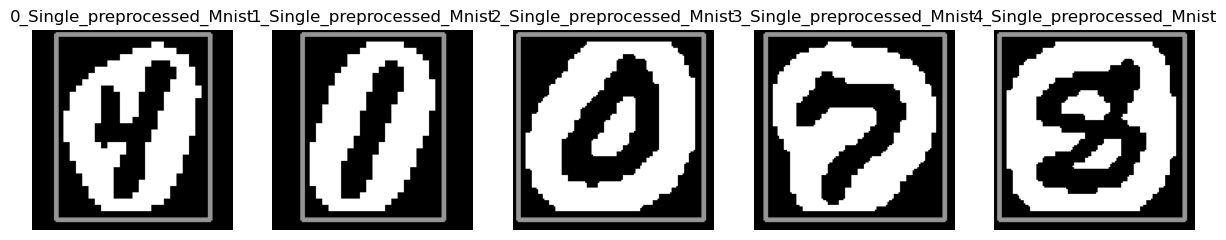


Displaying images for JSON: Multi_Mnist_labels.json


<Figure size 1500x300 with 0 Axes>

In [15]:
### import os
import re
import cv2

IN_DIR = os.path.join(BASE_DIR, "Preprocessed")
PREPROCESSED = os.path.join(BASE_DIR, "Preprocessed")
SEGMENTED = os.path.join(BASE_DIR, "Segmentation")
OUT_DIR = os.path.join(BASE_DIR, "Segmentation")
MNIST_PATH = os.path.join(SEGMENTED, "Mnist")
EMNIST_PATH = os.path.join(SEGMENTED, "Emnist")
MID_DIR = PREPROCESSED



import os
import json
import matplotlib.pyplot as plt
import cv2

# Paths
JSON_DIR = MNIST_PATH    # folder containing  JSON files
IMG_DIR = MNIST_PATH   # folder containing PNG images

def display_images_from_all_jsons(json_dir, img_dir, max_images_per_json=5):
    # Loop through all JSON files
    for json_file in os.listdir(json_dir):
        if not json_file.endswith(".json"):
            continue

        json_path = os.path.join(json_dir, json_file)
        with open(json_path, "r") as f:
            data = json.load(f)

        print(f"\nDisplaying images for JSON: {json_file}")

        plt.figure(figsize=(15, 3))
        count = 0
        for item in data:
            if count >= max_images_per_json:
                break
            title = item.get("Title")
            char = item.get("Chars")
            if not title:
                continue

            png_path = os.path.join(img_dir, f"{title}.png")
            if not os.path.exists(png_path):
                print(f"[WARNING] Image not found for title: {title}")
                continue

            img = cv2.imread(png_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"[ERROR] Failed to read image: {png_path}")
                continue

            plt.subplot(1, max_images_per_json, count + 1)
            plt.imshow(img, cmap="gray")
            plt.title(title)
            plt.axis("off")
            count += 1
            print(f"   {Colour.MAGENTA}Title: {title}{Colour.END}")
            print(f"   {Colour.MAGENTA}Chars: {char}{Colour.END}")

        plt.show()

# Example usage
display_images_from_all_jsons(JSON_DIR, IMG_DIR)

In [17]:
from sklearn.metrics import f1_score

#Changes
#Updated to Use Function
#Added Input Layer

def Convolutional_Neural_Network(input_shape,num_classes):
        print(f"{Colour.YELLOW}\n--- Training CNN Model ---{Colour.END}")
        model =  tf.keras.models.Sequential(
              [
              tf.keras.layers.Input(shape=input_shape),
             # tf.keras.layers.Input(shape=(28,28,1)),input_shape
                       #Scan image with small FILTERS/KENNEL----------Transform image into 32 Feature Maps ( Map show where spec patts were found edges,dots,lines)
              tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
              #Reduce size of image Without Loosing Crit details-------increase speed of model as less details to filt
              tf.keras.layers.MaxPooling2D((2,2)),      #2,2 AS EACH 2 by 2 area becomes 1 pixel  AKA SHRINK IMAGE IN HALF
              tf.keras.layers.Conv2D(128, (3,3), activation='relu'),   #3,3 as its a good balacnce for small local features,  ANOTHER RELU  as it keeps learning non-lin and avoid DEAD VALS
              #Reduce data size and compelxity
              tf.keras.layers.MaxPooling2D((2,2)), #
              #Take the 2d data(GRID) and flattern it into 1d AKA SINGLE ROW
              tf.keras.layers.Flatten(),# EG: if out was (7,7,64) it would flattern into long vec of 7x7x64=3136 numbers
              #Every input connects to every neuron----------Weird neural splasticity
              tf.keras.layers.Dense(128, activation='relu'),# 64 is th num of neurons in this layer, and relu for help with non lin/speed,
              tf.keras.layers.Dropout(0.4),#added for models kink for the letter q and h

              tf.keras.layers.Dense(num_classes, activation='softmax')# 10 output neurons aka ONE FOR EACH POTENIAL DIGIT
              #Softmax tursn the 10 raw scores itno proabilits that all add up to 1
              ],
        name="Convolutional_Neural_Network"
        )

        print(model.name)
        model.compile(
              optimizer='adam',#How the model update itself
              loss='categorical_crossentropy', # how it measure mistajkes
              metrics=['accuracy']  #track often of correct guess

              )


        model.summary()
        return model


def Convolutional_Analysis(model, x_test, y_test, num_classes):

    print(f"{Colour.YELLOW}\n--- Evaluating CNN Model ---{Colour.END}")

    # Ensure y_test is a clean 1-D array
    y_true = np.array(y_test).reshape(-1)

    # One-hot encode for evaluation
    y_test_cat = to_categorical(y_true, num_classes=num_classes)

    # Confirm equal lengths
    assert x_test.shape[0] == y_test_cat.shape[0], \
        f"Mismatch: x_test={x_test.shape[0]}, y_test={y_test_cat.shape[0]}"

    # Evaluate model
    cnn_loss, cnn_accuracy = model.evaluate(x_test, y_test_cat, verbose=1)
    print(f"Test Accuracy: {Colour.RED}{cnn_accuracy * 100:.2f}%{Colour.END}")
    print(f"Test Loss: {Colour.RED}{cnn_loss:.4f}{Colour.END}")

    # Predictions
    preds = model.predict(x_test, verbose=0)
    y_pred = np.argmax(preds, axis=1)
    cnn_f1 = f1_score(y_true, y_pred, average="weighted")


    print(f"Weighted F1-Score: {Colour.RED}{cnn_f1:.4f}{Colour.END}")

    mistakes = np.where(y_pred != y_true)[0]
    print(f"Total Mistakes: {len(mistakes)}")

    if len(mistakes) > 0:
        plt.figure(figsize=(15, 3))
        for i, idx in enumerate(mistakes[:10]):
            plt.subplot(1, 10, i+1)
            plt.imshow(x_test[idx].squeeze(), cmap="gray")
            plt.title(f"T:{y_true[idx]} P:{y_pred[idx]}")
            plt.axis("off")
        plt.show()

    return cnn_accuracy, cnn_f1


In [19]:
import time
from sklearn.ensemble import RandomForestClassifier


def K_Nearest_Neighbors(x_train_flat,y_train):
    print(f"{Colour.YELLOW}\n--- Training KNN Model ---{Colour.END}")


    knn = KNeighborsClassifier(n_neighbors=3,
                               weights='distance',#if closer the neighbour matter more
                               n_jobs=-1)#use all cpu cores
    knn.fit(x_train_flat, y_train)

    #knn.summary
    return knn
def K_Analysis(knn,x_test_flat,y_test):
    print(f"{Colour.YELLOW}\n--- Evaluating KNN Model ---{Colour.END}")
    y_pred_knn = knn.predict(x_test_flat)
    knn_accuracy = accuracy_score(y_test, y_pred_knn)
    knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

    print(f"Test Accuracy: {Colour.RED}{knn_accuracy * 100:.2f}%{Colour.END}")
    print(f"Weighted F1-Score: {Colour.RED}{knn_f1:.4f}{Colour.END}")


# --- Configuration ---
RANDOM_SEED = 42
# Increased RF estimators for better performance on flattened data
N_ESTIMATORS_RF = 300
# Increased CNN epochs for better training convergence
EPOCHS_CNN = 5
BLOCK_SIZE = 28 # MNIST digit size





#random forest
#ADDED Max depth for
def train_random_forest(x_train_rf,y_train_rf):
    """Trains the Random Forest model."""
    print(f"{Colour.YELLOW}--- Training RF Model ---{Colour.END}")
    rf = RandomForestClassifier(
        # Increased estimators (300) Maybe put to 100
        n_estimators=N_ESTIMATORS_RF,
        max_depth=50,
        random_state=RANDOM_SEED,
        n_jobs=-1
    )

    rf.fit(x_train_rf, y_train_rf)
    return rf

def rf_Analysis(rf,x_test_flat,y_test):
    print(f"{Colour.YELLOW}\n--- Evaluating RF Model ---{Colour.END}")
    start_time = time.time()
    y_pred_rf=rf.predict(x_test_flat)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

    print(f"Test Accuracy: {Colour.RED}{rf_accuracy * 100:.2f}%{Colour.END}")
    print(f"Weighted F1-Score: {Colour.RED}{rf_f1:.4f}{Colour.END}")

    end_time = time.time()
    print(f"RF Training completed in {Colour.RED}{end_time - start_time:.2f} seconds.{Colour.END}")
    return rf


In [21]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import f1_score



# ------------------------------
# Dense Neural Network
# ------------------------------
def Dense_Neural_Network(input_shape, num_classes):
    print(f"{Colour.YELLOW}\n--- Training DNN Model ---{Colour.END}")
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------
# Evaluate model
# ------------------------------
def Dense_Analysis(model, x_test, y_test, num_classes=36):
    print(f"{Colour.YELLOW}\n--- Evaluating DNN Model ---{Colour.END}")
    # Ensure y_test is a clean 1-D array
    y_true = np.array(y_test).reshape(-1).astype(int)
    y_pred_prob = model.predict(x_test, verbose=0)
    y_pred = np.argmax(y_pred_prob, axis=1)
     # Confirm equal lengths

    dnn_loss, dnn_accuracy = model.evaluate(x_test, to_categorical(y_true, num_classes), verbose=0)



    dnn_f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Test Accuracy: {Colour.RED}{dnn_accuracy * 100:.2f}%{Colour.END}")
    print(f"Test Loss: {Colour.RED}{dnn_loss:.4f}{Colour.END}")

    print(f"Weighted F1-Score: {Colour.RED}{dnn_f1:.4f}{Colour.END}")

    mistakes = np.where(y_pred != y_true)[0]
    print(f"Total Mistakes: {len(mistakes)}")




# ------------------------------
# Train model
# ------------------------------

Cycle Start: We are in the get_model
Please select a dataset(0=Mnist)(1=Emnist) or (2=load preexisting) Quit(q)
Selection:

 0


You have Selected Mnist.

   Moved to minst_loader
Dataset Loaded
   Moved to test_train_split


2025-11-21 00:55:16.855131: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Train:
  X_train:(60000, 28, 28, 1),
  Y_train:(60000,)

Test:
  X_test:(10000, 28, 28, 1),
  Y_test:(10000,)

Please select a model(0=NoModel, 1=CNN, 2= DNN, 3=RF, 4=KNN, 5=ALL)


Selection: 1


you have selected Convolutional Neural Networks (CNN) 

--- Training CNN Model ---
Convolutional_Neural_Network


Model: "Convolutional_Neural_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.7597 - loss: 0.7370 - val_accuracy: 0.9866 - val_loss: 0.0408
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9442 - loss: 0.1820 - val_accuracy: 0.9901 - val_loss: 0.0287
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9609 - loss: 0.1316 - val_accuracy: 0.9910 - val_loss: 0.0266
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9654 - loss: 0.1175 - val_accuracy: 0.9916 - val_loss: 0.0258
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9709 - loss: 0.0938 - val_accuracy: 0.9916 - val_loss: 0.0222
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9746 - loss: 0.0859 - val_accuracy: 0.9929 - val_loss: 0.0204
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9765 - loss: 0.0800 - val_accuracy: 0.9896 - val_loss: 0.0343
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9798 - loss: 0.0700 - val_accurac

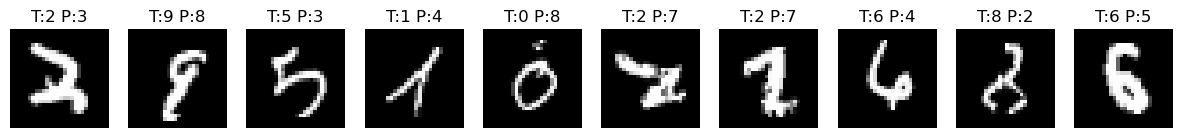

CNN model saved at: /Users/tanmaysingh/Desktop/Models/mnist_CNN.keras
Cycle Start: We are in the get_model
Please select a dataset(0=Mnist)(1=Emnist) or (2=load preexisting) Quit(q)
Selection:

 q


  Exiting Program


SystemExit: 

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [23]:
## Here will be the model calling stuff
''''
We want to split the functions as its too heavy


'''
from sklearn.metrics import accuracy_score, f1_score

import joblib
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
IN_DIR = os.path.join(BASE_DIR, "Preprocessed")
SEGMENTED = os.path.join(BASE_DIR, "Segmentation")
OUT_DIR = os.path.join(BASE_DIR, "Segmentation")
os.makedirs(OUT_DIR, exist_ok=True)

DUAL_FOLDER = SEGMENTED
json_file = os.path.join(DUAL_FOLDER, "labels.json")
import tensorflow as tf

#from pathlib import Path
#from sklearn.utils import shuffle
from PIL import Image
import os
import json
import cv2
#from pathlib import Path
import numpy as np

#fucked
#mopt wprl

from datetime import datetime
'''
It was easier to use concaternate to combind both
'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator







def char_to_int(c):
    """Convert a single character to integer label."""
    if c.isdigit():
        return int(c)
    elif c.isalpha():
        return ord(c.lower()) - ord('a') + 10
    else:
        return 0


#TO ADD COMPAT WITH OTHER MODS ADD OPTYION 1 = reshape for mlp,dnn etc
def json_loader():
    x_data, y_data, filenames = [], [], []
    choice = int(input("Enter your choice:(mnist=0)(emnist=1) "))

    if choice == 0:
        folder = os.path.join(SEGMENTED, "Mnist")
        dataset="Mnist"
    elif choice == 1:
        folder = os.path.join(SEGMENTED, "Emnist")
        dataset="Emnist"

    for fname in os.listdir(folder):
        if not fname.endswith(".json"):
            continue
        with open(os.path.join(folder, fname), "r") as f:
            data = json.load(f)
        for item in data:
            title = item.get("Title")
            chars = item.get("Chars")
            if not title or not chars:
                continue
            png_path = os.path.join(folder, f"{title}.png")  # Assuming PNG name = Title + .png
            if not os.path.exists(png_path):
                print(f"File not found: {png_path}")
                continue
            img = Image.open(png_path).convert("L").resize((64, 64))
            x_data.append(np.array(img, dtype=np.float32) / 255.0)
            filenames.append(png_path)
            y_data.append(chars)  # Directly append the int list

    print(f"Loaded {len(x_data)} images from JSON.")
    return np.array(x_data), np.array(y_data, dtype=object), filenames,dataset

''''
We want to split the functions as its too heavy


'''
def datagen_block(x_train):
      # Data augmentation
      datagen = ImageDataGenerator(
                    rotation_range=15,       # rotate +=15 degrees
                    width_shift_range=0.1,  # Changed from shift =+2 pixels t0 0.1 for consitenct
                    height_shift_range=0.1, # Changed from shift =+2 pixels t0 0.1 for consitenct aka the valure was  2/28,
                    zoom_range=0.2,          # slight zoom chanegd to 0.2
                    shear_range=0.1, #old val5,           # small shear
                    horizontal_flip=False    # do not flip letters
                    ,
                    vertical_flip=False,
                    validation_split=0.1  # keep 10% for validation
                )
      datagen.fit(x_train)
      return datagen
#REPALCE MLP WITH SVM!!!!!!!
# Before using it in case 1

from tensorflow.keras.models import save_model

def get_model(which_model=None, skip_input=False):
  save_dir = "models"
  os.makedirs(save_dir, exist_ok=True)
  available_models = [
      "Pray",
      "Convolutional Neural Networks (CNN) ",
      "Deep Neural Networks (DNN) ",

      "Random Forest(RF)",
      "K-Nearest Neighbors (KNN)"
      "All"
  ]
  while True:
    try:

      #skip[ case]
      if not skip_input:
        print("\033[34mCycle Start: We are in the get_model\033[0m") #DELETE delete Remove Remove Temp
       #print(f"{Colour.RED}Training Images: {x_train.shape}, Training Labels: {y_train.shape}{Colour.END}")


        print(f"Please select a dataset(0=Mnist)(1=Emnist) or (2=load preexisting) Quit(q)")
        print(f"{Colour.YELLOW}Selection{Colour.END}:", end="")
        dataset="n/a"
        choice=reuseable_end_sequence("") #Characters cause what the fuck is them
        if choice and choice.strip():
                dataset_choice=int(choice)
                match dataset_choice:
                  case 0:
                    dataset="Mnist"
                    print(f"{Colour.CYAN}You have Selected {dataset}.{Colour.END}\n")
                    option=0

                    x_train, y_train, x_test, y_test = mnist_loader()

                    np.savez_compressed("mnist.npz", x_train=x_train, y_train=y_train,
                    x_test=x_test, y_test=y_test)

                  case 1:
                    dataset="Emnist"

                    print(f"{Colour.CYAN}You have Selected {dataset}.{Colour.END}\n")
                    option=1

                    x_train, y_train, x_test, y_test =emnist_loader()


                    print(f"X_train:{x_train.shape}\n Y_train:{y_train.shape}\n X_test:{x_test.shape}\n  Y_test:{y_test.shape}\n")
                       # Convert & normalize in-place

                    #One Hot Encoded
                    # Dense and KNN use flattened input
                   # x_train_flat = x_train.reshape(-1, 28*28)
                    #x_test_flat  = x_test.reshape(-1, 28*28)
                    # Flatten for Dense network
                    #x_train_flat = x_train.reshape(x_train.shape[0], -1)
                   # x_test_flat  = x_test.reshape(x_test.shape[0], -1)

                    # Reshape for CNN
                    #x_train_cnn = np.expand_dims(x_train, -1)
                    #x_test_cnn  = np.expand_dims(x_test, -1)
                    np.savez_compressed("emnist.npz", x_train=x_train, y_train=y_train,
                    x_test=x_test, y_test=y_test)


                  case 2:
                    choice=int(input("Please select a dataset:(0=Mnist)(1=Emnist)"))

                    if choice==0:
                        file_path = "mnist.npz"
                        dataset="Mnist"
                        if os.path.exists(file_path):
                            data = np.load(file_path)
                        data = np.load(file_path)

                    elif choice==1:
                        file_path = "emnist.npz"
                        dataset="Emnist"
                        if os.path.exists(file_path):
                            data = np.load(file_path)
                        data = np.load(file_path)

                    else:
                        print("Invalid choice")
                    if choice in [0,1]:

                        x_train = data['x_train']
                        y_train = data['y_train']
                        x_test  = data['x_test']
                        y_test  = data['y_test']
                        print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
                        print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

                  case 3:
                      print("folder")
                      x_train, y_train, filenames,dataset = json_loader()
                      x_test, y_test = x_train, y_train

                  case _:
                    raise ValueError(f"Invalid Selection.")
        OUT_DIR_2 = os.path.join(OUT_DIR, dataset)

            # One-hot encode labels


        print("Please select a model(0=NoModel, 1=CNN, 2= DNN, 3=RF, 4=KNN, 5=ALL)")
        which_model = int(
              input("Selection:")
          )

      if which_model==0 or which_model is None:
        print("No Model")
        return None, which_model
    #Cylic or cycle redunandy tests
      if  skip_input:
        print("\033[34mReturned to the get_model function\033[0m")#DELETE delete Remove Remove Temp
      #processed_img = preprocess_for_model(img, which_model)
      num_classes= len(np.unique(y_train))
      x_train_flat = x_train.reshape(x_train.shape[0], -1).astype("float32") / 255.0
      x_test_flat  = x_test.reshape(x_test.shape[0], -1).astype("float32") / 255.0

      match which_model:
          case 0:

            print("no model")
          # Multi Layer Perception Model (MLPs)



          # Convolutional Neural Networks (CNNs)
          case 1:

                print(f"you have selected {available_models[which_model]}")

                #Expand dims if needed (28x28 -> 28x28x1)

                if x_train.ndim == 3:# (N, H, W)
                    x_train = np.expand_dims(x_train, -1)
                if x_test.ndim == 3:
                    x_test = np.expand_dims(x_test, -1)

                #call for num classes
                model_ran=0
                model_name="CNN"
                num_classes,model_path=dataset_selection(dataset,model_ran,model_name)
                # One-hot encode labels

                y_train_cat = to_categorical(y_train, num_classes)
                y_test_cat  = to_categorical(y_test, num_classes)


                # Data augmentation
                datagen=datagen_block(x_train)

                model = Convolutional_Neural_Network((28, 28, 1), num_classes)

                # Callbacks
                model_ran=1
                num_classes,model_path=dataset_selection(dataset,model_ran,model_name)
                # mvoed to dataset classmodel_path = os.path.join(MODELS_DIR, "cnn.keras")
               # print(x_train[0])
                #print(y_train_cat[0])
               # print(y_test_cat[0])
                #print(x_test[0])
                # Train with augmented data
                if dataset=="Mnist":
                    model.fit(
                        datagen.flow(x_train, y_train_cat, batch_size=64),#changed from 32 to 64
                        epochs=20,
                        validation_data=(x_test, y_test_cat),

                        #steps_per_epoch=64,
                        verbose=1
                    )
                else:

                    model.fit(
                        datagen.flow(x_train, y_train_cat, batch_size=64),#changed from 32 to 64
                        epochs=35,
                        validation_data=(x_test, y_test_cat),

                        #steps_per_epoch=64,
                        verbose=1
                    )



                # Evaluate and display mistakes
                Convolutional_Analysis(model, x_test, y_test , num_classes)


                print(f"CNN model saved at: {model_path}")

               # Save model (overwrite old CNN)
                if os.path.exists(model_path):
                    os.remove(model_path)
                model.save(model_path)

          case 2:
            print(f"you have selected {available_models[which_model]}")

            # Flatten images for DNN

            if x_train.ndim == 4 and x_train.shape[-1] == 1:
                x_train = x_train.squeeze(-1)

            if x_test.ndim == 4 and x_test.shape[-1] == 1:
                x_test = x_test.squeeze(-1)


            y_train_int = np.array(y_train, dtype=np.int32)
            y_test_int  = np.array(y_test, dtype=np.int32)
            model_name="DNN"
            # Get number of classes and model path
            model_ran = 0
            num_classes, model_path = dataset_selection(dataset, model_ran,model_name)
            #num_classes = len(np.unique(y_train_int))

            # Create DNN model
            model = Dense_Neural_Network((x_train_flat.shape[1],), num_classes)

            # One-hot encode labels for Keras
            y_train_cat = to_categorical(y_train_int, num_classes)
            y_test_cat  = to_categorical(y_test_int, num_classes)

            model_ran = 1
            num_classes, model_path = dataset_selection(dataset, model_ran,model_name)

            # (old broken one-hot removed this is one of the changes I made since the demo)
            # y_train_cat = to_categorical(y_train, num_classes)
            # y_test_cat  = to_categorical(y_test, num_classes)

            # Train with augmented data
            if dataset=="Mnist":
                model.fit(
                         x_train_flat, y_train_cat,
                         epochs=15,
                         validation_data=(x_test_flat, y_test_cat),
                         batch_size=64,
                         #steps_per_epoch=64,
                         verbose=1
                    )
            else:
                model.fit(
                     x_train_flat, y_train_cat,
                     epochs=22,
                     validation_data=(x_test_flat, y_test_cat),
                     batch_size=64,
                     #steps_per_epoch=64,
                     verbose=1
                )

            # Evaluate and display mistakes
            Dense_Analysis(model, x_test_flat, y_test, num_classes)

            # Save model (overwrite old DNN)
            if os.path.exists(model_path):
                os.remove(model_path)
            model.save(model_path)



         #rANDOM FOREST
          case 3:
            print(f"you have selected {available_models[which_model]}")
            model_ran=0
            model_name="RF"
            num_classes, model_path = dataset_selection(dataset, model_ran,model_name)

            # RF requires flattened input (N, 784)


            x_train_rf = x_train.reshape(x_train.shape[0], -1)
            x_test_rf = x_test.reshape(x_test.shape[0], -1)
            y_train_rf = y_train
            y_test_rf = y_test

            print(f"RF Train Data Shape: {x_train_rf.shape}")
             # Train the Random Forest Model
            model = train_random_forest(x_train_rf,y_train_rf)
            rf_Analysis(model,x_test_flat,y_test)
            model_ran=1
            num_classes, model_path = dataset_selection(dataset, model_ran,model_name)
             # Save model (overwrite old DNN)
            if os.path.exists(model_path):
                os.remove(model_path)

            joblib.dump(model, model_path)

        #KNN
          case 4:
            print(f"you have selected {available_models[which_model]}")
            knn=K_Nearest_Neighbors(x_train_flat,y_train
)
            K_Analysis(knn,x_test_flat,y_test)
              #all

          case 5:
               print(f"you have selected {available_models[which_model]}")
          case _:
            raise ValueError("\033[31m  Invalid Input! Please enter a valid selection.\033[0m\n")#  ' 0 or 1' whjich better
    except ValueError as e:
        print(e)

def dataset_selection(dataset,model_ran,model_name):

                # Build model
    MODELS_DIR = os.path.join(BASE_DIR, "Models")
    os.makedirs(MODELS_DIR, exist_ok=True)
    if dataset == "Mnist":
        num_classes = 10

        model_path = os.path.join(MODELS_DIR, f"mnist_{model_name}.keras")
 #
    elif dataset == "Emnist":
        num_classes = 27
        model_path = os.path.join(MODELS_DIR, f"emnist_{model_name}.keras")
    else:
        raise ValueError("\033[31m  Invalid Input! Please enter a valid selection.\033[0m\n")
    return num_classes, model_path
get_model(which_model=None,skip_input=False)

from tensorflow.keras.models import load_model

'''''
IDEA

Run model ask
move to train or test
after confirm
it fil in rel details

issue
We will ne4ed to have cases for t type of models



imports model_choice form the thing
ebfore

If it is 1
then it rusn all the mlp stuff etc

It ran for 32 epochs

second time it ran for 39
Epoch 39/100

Test Accuracy: 95.47%
Test Loss: 0.1869
Weighted F1-Score: 0.9566
Total Mistakes:1123

third run epoch 49/100
Test Accuracy: 95.54%
Test Loss: 0.1897
Weighted F1-Score: 0.9575
Total Mistakes:1106

4
Epoch 32/100
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9839 - loss: 0.0393 - val_accuracy: 0.9616 - val_loss: 0.1726 - learning_rate: 6.2500e-05

--- Evaluating CNN Model ---
775/775 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9549 - loss: 0.1694
775/775 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test Accuracy: 95.49%
Test Loss: 0.1694
Weighted F1-Score: 0.9568
Total Mistakes:1118




case 4:#beta test no work yet temp
                        folder = input("Enter folder path: ")
                        x_train, y_train = load_images_from_folder(folder)
                        x_test, y_test = x_train, y_train  # simple split
case 2:
                    dataset="Folder"
print working dir
Ask user if they would liek to use emnsit or mnist
if mnist
dataset="mnist"
go to the folder    OUT_DIR_2 = os.path.join(OUT_DIR, dataset) aka go to the folder
then search for jsons
and for images


'''

